**<font size=5> Data analysis Project 3: Applying machine learning methods to movie ratings data </font>**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier

sns.set_style('darkgrid')

In [3]:
raw_df = pd.read_csv('../movieReplicationSet.csv')
df = raw_df.fillna(raw_df.mean()) # Fill in missing values
df.head()

,The Life of David Gale (2003),Wing Commander (1999),Django Unchained (2012),Alien (1979),Indiana Jones and the Last Crusade (1989),Snatch (2000),Rambo: First Blood Part II,Fargo (1996),Let the Right One In (2008),Black Swan (2010),...,When watching a movie I cheer or shout or talk or curse at the screen,When watching a movie I feel like the things on the screen are happening to me,As a movie unfolds I start to have problems keeping track of events that happened earlier,"The emotions on the screen ""rub off"" on me - for instance if something sad is happening I get sad or if something frightening is happening I get scared",When watching a movie I get completely immersed in the alternative reality of the film,Movies change my position on social economic or political issues,When watching movies things get so intense that I have to stop watching,Gender identity (1 = female; 2 = male; 3 = self-described),Are you an only child? (1: Yes; 0: No; -1: Did not respond),Movies are best enjoyed alone (1: Yes; 0: No; -1: Did not respond)
0,2.151316,2.021127,4.000000,2.707612,3.000000,2.597656,2.365385,2.899606,2.49635,2.911565,...,1.0,6.0,2.0,5.0,5.0,5.0,1.0,1.0,0,1
1,2.151316,2.021127,1.500000,2.707612,2.778618,2.597656,2.365385,2.899606,2.49635,2.911565,...,3.0,1.0,1.0,6.0,5.0,3.0,2.0,1.0,0,0
2,2.151316,2.021127,3.153422,2.707612,2.778618,2.597656,2.365385,2.899606,2.49635,2.911565,...,5.0,4.0,3.0,5.0,5.0,4.0,4.0,1.0,1,0
3,2.151316,2.021127,2.000000,2.707612,3.000000,2.597656,2.365385,2.899606,2.49635,4.000000,...,3.0,1.0,1.0,4.0,5.0,3.0,1.0,1.0,0,1
4,2.151316,2.021127,3.500000,2.707612,0.500000,2.597656,0.500000,1.000000,2.49635,0.000000,...,2.0,3.0,2.0,5.0,6.0,4.0,4.0,1.0,1,1


### Question 1

Apply dimension reduction methods – specifically a PCA – to the data in columns 422-474.
It is up to you whether you do one PCA each for personality and
movie experience, or one overall.

In [3]:
pca_df = df.iloc[:, 421:474].fillna(df.mean())
print(pca_df.shape)

(1097, 53)


In [4]:
pca = PCA()
output_pca = pca.fit_transform(pca_df);

a) Determine the number of factors (principal components) that you will interpret meaningfully (by
a criterion of your choice – but make sure to name that criterion). Include a Scree plot in your
answer.

In [5]:
acc_variance = np.cumsum(pca.explained_variance_ratio_)
major_components = np.where(acc_variance > 0.8)[0][1]
display(major_components)

27

In order to determine the number of components to use, I would either choose the number of principal components that exceed an explained variance of 80% (as seen above, that is 27) or determine visually where does the steep decline stop in the Scree plot (as seen below, that would be around 10)

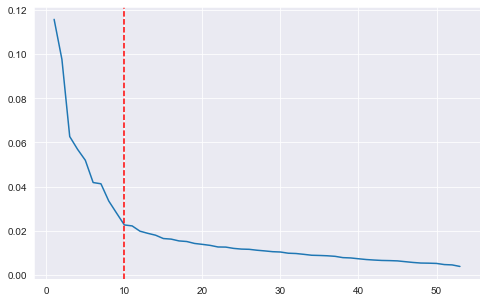

Visually, the steep decline stops at around 10 principal components.


In [24]:
plt.figure(figsize=(8,5))
sns.lineplot(x=range(1, len(pca.singular_values_)+1), y=pca.explained_variance_ratio_)
plt.axvline(x=10, color='r', linestyle='dashed')
plt.show()

print('Visually, the steep decline stops at around 10 principal components.')

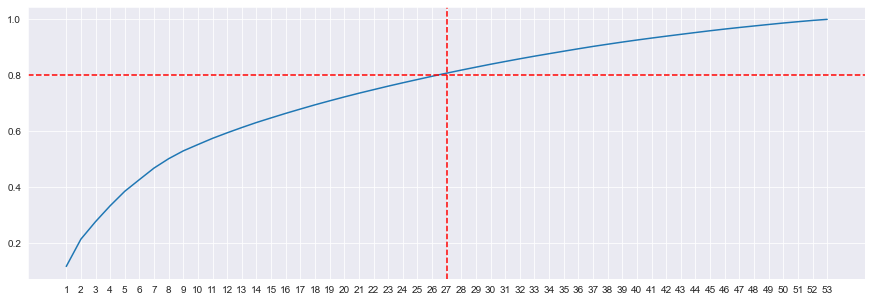

The cumulative explained variance arrives to 80% when 27 principal components are used.


In [25]:
plt.figure(figsize=(15,5))
plt.plot(range(1, len(pca.singular_values_)+1), acc_variance)
plt.axhline(y=0.8, color='r', linestyle='dashed')
plt.axvline(x=major_components, color='r', linestyle='dashed')
plt.xticks(range(1, len(pca.singular_values_)+1),range(1, len(pca.singular_values_)+1))
plt.show()

print('The cumulative explained variance arrives to 80% when {} principal components are used.'.format(major_components))

The method of eyeballing a Scree plot is more subjective compared to the Scree plot but 27 eigenvalues are a lot so I will use the Scree plot result, 10 eigenvalues.

b) Semantically interpret what those factors represent (hint: Inspect the loading)

In [6]:
major_eigenvectors = pd.DataFrame(pca.components_[:10,:])
major_eigenvectors.columns = df.iloc[:, 421:474].columns
major_eigenvectors.head()

,Tends to find fault with others,Does a thorough job,Is depressed/Blue,Is original/comes up with new ideas,Is reserved,Is helpful and unselfish with others,Can be somewhat careless,Is relaxed/handles stress well,Is curious about many different things,Is full of energy,...,I have cried during a movie,I have trouble following the story of a movie,I have trouble remembering the story of a movie a couple of days after seeing it,When watching a movie I cheer or shout or talk or curse at the screen,When watching a movie I feel like the things on the screen are happening to me,As a movie unfolds I start to have problems keeping track of events that happened earlier,"The emotions on the screen ""rub off"" on me - for instance if something sad is happening I get sad or if something frightening is happening I get scared",When watching a movie I get completely immersed in the alternative reality of the film,Movies change my position on social economic or political issues,When watching movies things get so intense that I have to stop watching
0,0.129240,-0.115885,0.264666,-0.115511,0.154504,-0.128309,0.129097,-0.227325,-0.088483,-0.217536,...,0.010044,0.120473,0.145753,0.023962,0.018183,0.159862,0.007278,-0.018637,0.009237,0.086573
1,0.005744,-0.050250,-0.073022,-0.097270,0.085454,-0.053352,-0.026927,0.096328,-0.095421,-0.113387,...,-0.266953,-0.081850,-0.048523,-0.305334,-0.385815,-0.138915,-0.340890,-0.312827,-0.250644,-0.230495
2,0.073524,-0.096175,-0.126145,-0.080497,-0.312309,-0.097036,0.139163,0.052942,-0.089134,0.130179,...,-0.017885,0.170302,0.220283,0.196723,0.030057,0.175766,-0.069048,-0.098728,-0.019345,0.057486
3,-0.252489,-0.152061,-0.138491,-0.082052,0.037583,0.091559,0.077702,0.161104,-0.076193,-0.042685,...,0.003045,0.158543,0.180500,-0.022292,0.046413,0.201878,0.059365,0.026599,0.088423,0.113726
4,-0.053727,0.133268,-0.036293,-0.164433,0.018788,0.036482,-0.307786,-0.140503,-0.130996,-0.060150,...,0.156848,0.190239,0.199729,0.139432,0.017698,0.171794,0.090499,-0.025647,-0.034643,0.086983


In [27]:
major_eigenvectors.iloc[9,:].sort_values().to_dict()

{'When watching a movie I feel like the things on the screen are happening to me': -0.493569775722974,
 'Has few artistic interests': -0.13353345350334106,
 'I have trouble remembering the story of a movie a couple of days after seeing it': -0.12212798221692796,
 'As a movie unfolds I start to have problems keeping track of events that happened earlier': -0.11838696331422938,
 'Is depressed/Blue': -0.11815111815321475,
 'Is ingenious/a deep thinker': -0.11338359098557109,
 'When watching a movie I get completely immersed in the alternative reality of the film': -0.08746102439031583,
 'Can be cold and aloof': -0.07356537717599715,
 'Has a forgiving nature': -0.0630930617761892,
 'Is helpful and unselfish with others': -0.057969620580649306,
 'Is a reliable worker': -0.05607048675635082,
 'Can be somewhat careless': -0.05166378634470935,
 'Tends to be disorganized': -0.04675170049134933,
 'Has an active imagination': -0.04649261394748303,
 'Generates a lot of Enthusiasm': -0.042919704790

These 10 eigenvectors are a representation of the data in the columns 422-474 which accounts for 75% of its variation.<br>
PC1: Positive/Negative mentality <br>
PC2: Emotionally fragile/emotionally stable<br>
PC3: Assertive/Meekness <br>
PC4: Forgiving/ruthless<br>
PC5: Structured/Unstructured<br>
PC6: Emotional/Cold<br>
PC7: Insecure/Empathetic<br>
PC8: Artsy/Non-artsy<br>
PC9: Social-watcher/Unsocial-watcher<br>
PC10: Passionate/Dispassionate <br>

### Question 2

Plot the data from columns 422-474 in the new coordinate system, where each dot represents a
person, and the axes represent the factors you found in 1). Hint: If you identified more than 2
meaningful factors, it is a good idea to create several 2D (X vs. Y) subplots for better interpretability.


In [7]:
PCs = pd.DataFrame(output_pca).iloc[:,:10]
PCs.rename(columns={0:'PC1', 1:'PC2', 2:'PC3', 3:'PC4', 4:'PC5', 5:'PC6', 6:'PC7', 7:'PC8', 8:'PC9', 9:'PC10'}, inplace=True)
display(PCs.head())

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
0,1.255025,0.356654,-1.882029,-0.217939,-3.070339,-2.797299,4.839509,0.041347,-2.725916,-1.212460
1,0.898957,1.476857,-2.459142,1.506252,-1.040602,-0.419761,1.370379,-1.843305,1.380392,1.476386
2,0.423047,-2.319598,0.575867,1.610419,-0.321976,0.721992,0.644442,-0.901206,1.831640,0.905263
3,-1.365413,-0.693096,-3.047420,-1.132961,-0.461746,3.450191,-2.208804,1.198831,1.485622,0.618432
4,2.777731,-1.373439,1.241760,0.398438,-0.202224,0.988518,-0.355753,-0.818672,-1.146449,1.186111


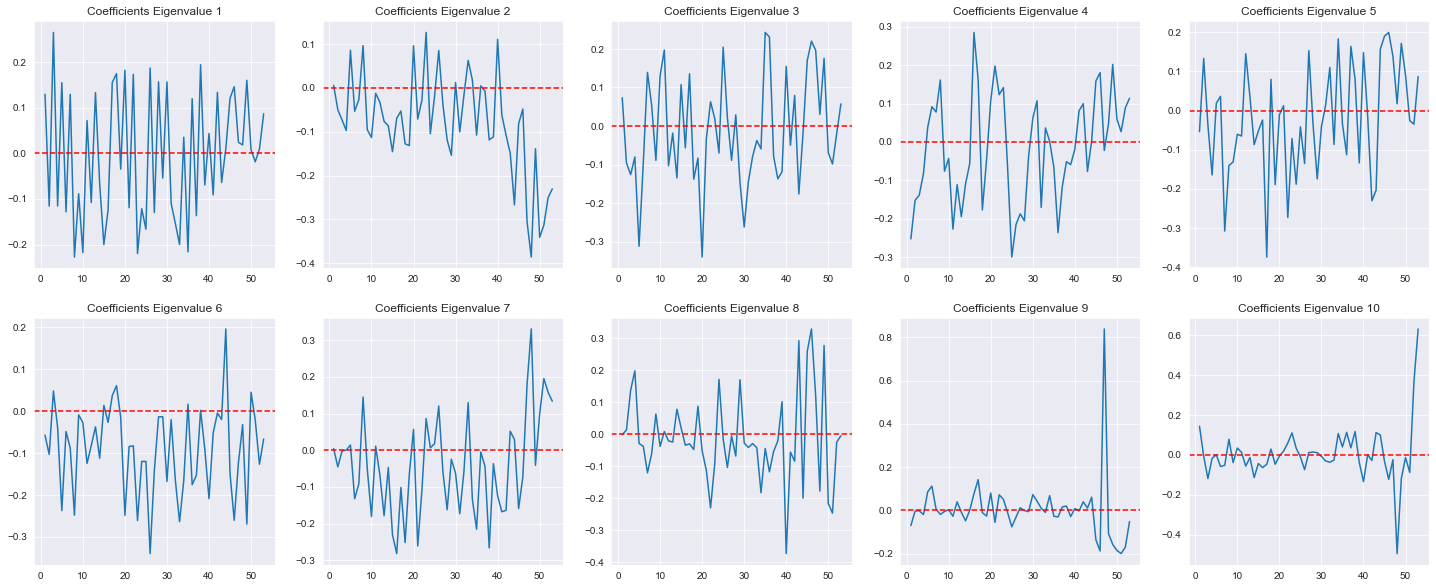

In [128]:
fig, axes = plt.subplots(2, 5, figsize=(25, 10))
for row in range(0,2):
    for col in range(0, 5):
        axes[row, col].plot(range(1, major_eigenvectors.shape[1]+1), major_eigenvectors.iloc[row*5+col,:])
        axes[row, col].axhline(y=0, color='r', linestyle='dashed')
        axes[row, col].set_title('Coefficients Eigenvalue {}'.format((row*5+col)+1))

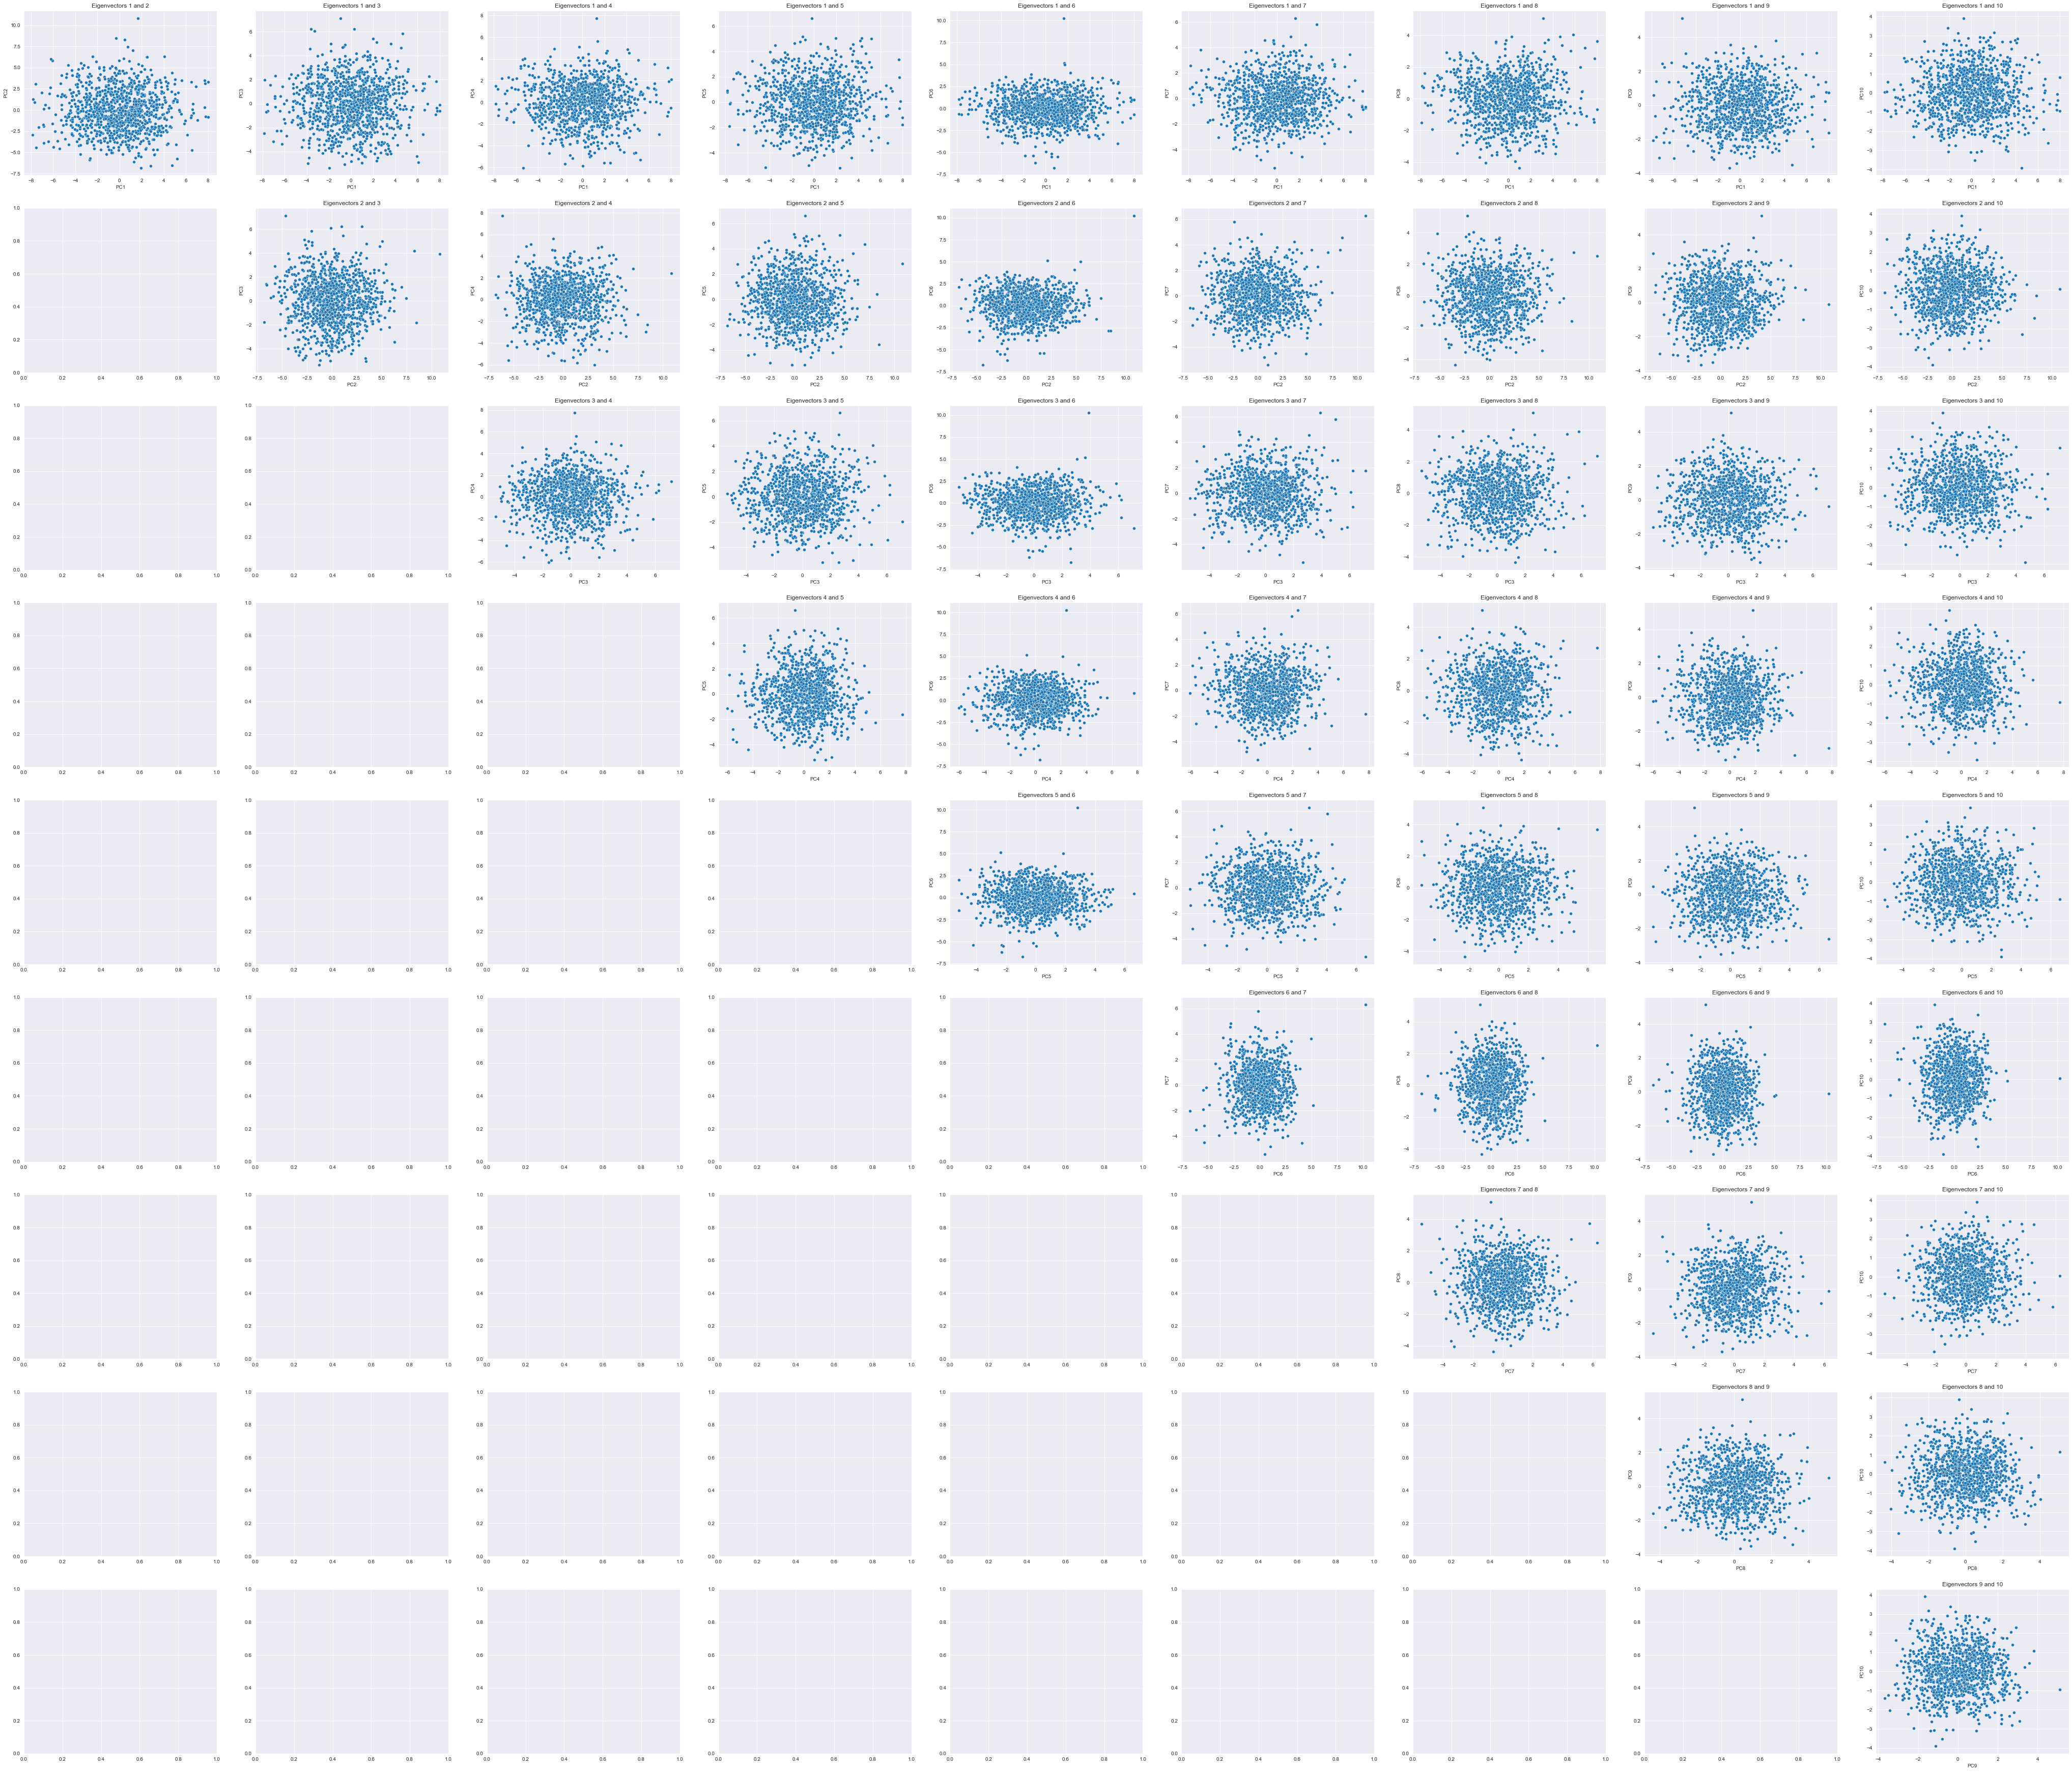

In [8]:
rows, columns = 9, 9

fig, axes = plt.subplots(rows, columns, figsize=(rows*8, columns*7))
for row in range(0,rows):
    for column in range(row+1,columns+1):
        sns.scatterplot(ax=axes[row,column-1], x=PCs.iloc[:,row], y=PCs.iloc[:,column])
        axes[row,column-1].set_title('Eigenvectors {} and {}'.format(row+1,column+1))

### Question 3

Identify clusters in this new space. Use a method of your choice (e.g. kMeans, DBScan, hierarchical
clustering) to do so. Determine the optimal number of clusters and identify which cluster a given user
is part of.


In [13]:
# Determines the appropiate amount of clusters for each principal component pair using a silhouette score
# The output consists of a dictionary with the PC pair as a key and the best number of clusters as the value.

range_n_clusters = [2, 3, 4, 5, 6]
cluster_dict = {}

for row in range(0,PCs.shape[1]-1):
    for column in range(row+1,PCs.shape[1]):
        
        best_cluster = 0
        best_score = 0
        for n_clusters in range_n_clusters:
            
            clusterer = KMeans(n_clusters=n_clusters, random_state=101)
            cluster_labels = clusterer.fit_predict(PCs.iloc[:, np.r_[row, column]])
            score = silhouette_score(PCs.iloc[:, np.r_[row, column]], cluster_labels)
            
            if score > best_score: 
                best_score, best_cluster = score, n_clusters
                
        cluster_dict[str(row+1) + '-' + str(column+1)] = best_cluster
        
        print("PCs{}-{}: For {} clusters, the best silhouette_score is : {}".format(row+1, column+1, best_cluster, best_score))

PCs1-2: For 3 clusters, the best silhouette_score is : 0.333583876707188
PCs1-3: For 2 clusters, the best silhouette_score is : 0.3580968768746347
PCs1-4: For 2 clusters, the best silhouette_score is : 0.3695025864982804
PCs1-5: For 2 clusters, the best silhouette_score is : 0.37461511234262634
PCs1-6: For 2 clusters, the best silhouette_score is : 0.3971682831820274
PCs1-7: For 2 clusters, the best silhouette_score is : 0.3963027483808667
PCs1-8: For 2 clusters, the best silhouette_score is : 0.4091478997500054
PCs1-9: For 2 clusters, the best silhouette_score is : 0.4210919260368736
PCs1-10: For 2 clusters, the best silhouette_score is : 0.43564059597162424
PCs2-3: For 2 clusters, the best silhouette_score is : 0.3441715782885682
PCs2-4: For 2 clusters, the best silhouette_score is : 0.3551333198396981
PCs2-5: For 2 clusters, the best silhouette_score is : 0.3616750238035978
PCs2-6: For 2 clusters, the best silhouette_score is : 0.3804452214449717
PCs2-7: For 2 clusters, the best sil

The first principal component pair (1-2) was assigned 3 clusters, let's take a look at its visualization.

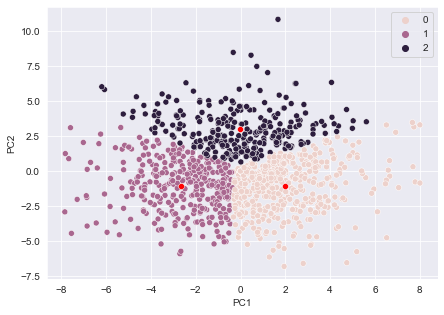

In [11]:
kmeans = KMeans(n_clusters=3, random_state=0).fit(PCs.iloc[:,:2])

centroids = kmeans.cluster_centers_
cluster_df = PCs.copy()
cluster_df['cluster'] = kmeans.labels_

plt.figure(figsize=(7,5))
sns.scatterplot(data=PCs, x='PC1', y='PC2', hue=cluster_df['cluster'])
sns.scatterplot(x=centroids[:,0], y=centroids[:,1], color='red')
plt.show()

In [15]:
# Creates a dataframe with the cluster label for each user and each principal component pair

features = pd.DataFrame()

for key in cluster_dict.keys():
    kmeans = KMeans(n_clusters=cluster_dict[key], random_state=101)
    kmeans.fit(PCs.iloc[:, np.r_[int(key.split('-')[0])-1, int(key.split('-')[1])-1]])
    features[str(key)] = kmeans.labels_
    
display(features.head())

,1-2,1-3,1-4,1-5,1-6,1-7,1-8,1-9,1-10,2-3,...,6-7,6-8,6-9,6-10,7-8,7-9,7-10,8-9,8-10,9-10
0,0,1,1,0,0,1,1,0,1,0,...,1,2,2,1,5,1,0,4,1,3
1,1,1,1,0,0,1,1,0,1,1,...,1,1,3,1,5,2,0,5,0,1
2,0,1,1,0,0,1,1,0,1,0,...,1,1,3,0,4,2,0,5,0,1
3,2,0,0,1,1,0,0,1,0,0,...,0,0,0,0,1,0,1,3,1,1
4,0,1,1,0,0,1,1,0,1,0,...,0,1,0,0,4,1,1,4,0,4
